In [23]:
#libraries and packages needed:
import csv
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

## error types analysis:

In [24]:
#report vs presentantion:
mpl.rc('font', family = 'serif')
mpl.rc('text', usetex = True)
mpl.rc('text.latex', preamble = r'\usepackage{amsmath}')
mpl.rcParams['figure.figsize'] = [10, 10]

what = 'report' #'presentation'

if what == 'presentation' :
    
    mpl.rcParams['font.size'] = 24
    mpl.rc('xtick', labelsize = 18) 
    mpl.rc('ytick', labelsize = 18)
    annotationstype = False
    cbar_length = 0.7
    
    # levels of theory:
    lots_all = ['B971', 'B3LYP', 'wB97XD', 'M062X', 'B2PLYP']
    lots_h = ['B971', 'B3LYP', 'wB97XD', 'M062X'] #h = hybrids
    lots_dh = ['B2PLYP'] #dh = double hybrids
    
    lots_labels = ['B97-1', 'B3LYP', r'$\omega$B97X-D', 'M06-2X', 'B2PLYP']

    # basis sets:
    bss_all = ['6-31Gs', 'pcseg-1', 'AUG-pcseg-1', 'pcseg-2', 'AUG-pcseg-2', 'Def2SVPD', 'Def2TZVPD', 'cc-pVDZ', 'cc-pVTZ']
    bss_h = bss_all
    bss_dh = ['6-31Gs', 'pcseg-1', 'AUG-pcseg-1', 'pcseg-2', 'Def2SVPD', 'Def2TZVPD', 'cc-pVDZ', 'cc-pVTZ']
    
    bss_labels = ['6-31G*', 'pcseg-1', 'aug-pcseg-1', 'pcseg-2', 'aug-pcseg-2', 'def2-SVPD', 'def2-TZVPD', 'cc-pVDZ', 'cc-pVTZ']
    
elif what == 'report' :
    
    mpl.rcParams['font.size'] = 16
    mpl.rc('xtick', labelsize = 14) 
    mpl.rc('ytick', labelsize = 14)
    annotationstype = True
    cbar_length = 0.8
    
    # levels of theory:
    lots_all = ['B3LYP', 'B971', 'PBE1PBE', 'TPSSh', 'M062X', 'wB97XD', 'B2PLYP', 'B2PLYPD']
    lots_h = ['B3LYP', 'B971', 'PBE1PBE', 'TPSSh', 'M062X', 'wB97XD'] #h = hybrids
    lots_dh = ['B2PLYP', 'B2PLYPD'] #dh = double hybrids
    
    lots_labels = ['B3LYP', 'B97-1', 'PBE0', 'TPSSh', 'M06-2X', r'$\omega$B97X-D', 'B2PLYP', 'B2PLYP-D']

    # basis sets:
    bss_all = ['6-31Gs', '6-31Gss', 'pc-1', 'pcseg-1', 'Def2SVP', 'cc-pVDZ', 'AUG-pcseg-1', 'Def2SVPD', 'AUG-cc-pVDZ', 'pc-2', 'pcseg-2', 'Def2TZVPD', 'cc-pVTZ', 'AUG-pcseg-2']
    bss_h = bss_all
    bss_dh = ['6-31Gs', '6-31Gss', 'pc-1', 'pcseg-1', 'cc-pVDZ', 'AUG-pcseg-1', 'Def2SVPD', 'pc-2', 'pcseg-2', 'Def2TZVPD', 'cc-pVTZ']
    
    bss_labels = ['6-31G*', '6-31G**', 'pc-1', 'pcseg-1', 'def2-SVP', 'cc-pVDZ', 'aug-pcseg-1', 'def2-SVPD', 'aug-cc-pVDZ', 'pc-2', 'pcseg-2', 'def2-TZVPD', 'cc-pVTZ', 'aug-pcseg-2']

In [25]:
#directories:
general_directory = '\\Users\\natia\\OneDrive\\Pulpit\\benchmark paper\\calculations\\failed'

#dict. to store error types:
error_types_data = {'intensity too high' : [],
                    'imaginary frequencies' : [],
                    'symmetry error' : [],
                    'termination error' : [],
                    'other' : [],
                    'intensity too high out of total no.' : [],
                    'imaginary frequencies out of total no.' : [],
                    'symmetry error out of total no.' : [],
                    'termination error out of total no.' : [],
                    'other out of total no.' : [],
                    '% intensity too high' : [],
                    '% imaginary frequencies' : [],
                    '% symmetry error' : [],
                    '% termination error' : [],
                    '% other' : []
                   }

error_types_data = pd.DataFrame(error_types_data) #from dict. to df

#define function to get percentages:
def percentages(value, length, round_to) :

    if round_to == 'integer' : #rounding to integers
    
        percent = np.round((value/length) * 100).astype(int)
    
    else : #other rounding
        
        percent = np.round((value/length) * 100, round_to)
    
    return percent

In [26]:
for lot in lots_all :

    #arrays for different error types per model chemistry:
    asterisks = []
    imaginary_freqs = []
    symmetry = []
    termination = []
    other = []
    
    for bs in bss_all :
        
        #variables to store different types of errors:
        a, f, s, t, o = 0, 0, 0, 0, 0
        
        file_run1 = f'{general_directory}\\run1\\{lot}\\{bs}\\{lot}_{bs}.csv' #run 1 files
        file_run2 = f'{general_directory}\\run2\\{lot}\\{bs}\\{lot}_{bs}.csv' #run 2 files
        
        if os.path.exists(file_run2) : #both runs done
            
            error_data_run2 = pd.read_csv(file_run2, encoding = 'latin1')
            error_type_run2 = error_data_run2['type of error'].to_numpy() #array of run 2 errors for this model chemistry
            
            for i in error_type_run2 :
                
                #if the run 2 has the specified error, add the error to corresponding variable:
                if i == '*****' :
                    a = a + 1

                elif i == 'imaginary frequencies':
                    f = f + 1

                elif i == 'symmetry error':
                    s = s + 1

                elif i == 'termination error' :
                    t = t + 1

                else :
                    o = o + 1
                
        elif os.path.exists(file_run1) : #only run 1 done
            
            error_data = pd.read_csv(file_run1, encoding = 'latin1')
            error_type = error_data['type of error'].to_numpy() #array of all errors for this model chemistry
            
            for i in error_type :

                #if the run 1 has the specified error, add the error to corresponding variable:
                if i == '*****' :
                    a = a + 1

                elif i == 'imaginary frequencies' :
                    f = f + 1

                elif i == 'symmetry error' :
                    s = s + 1

                elif i == 'termination error' :
                    t = t + 1

                else :
                    o = o + 1
            
        else: #no runs done
            
            print('No run for ' + lot + '/' + bs)
        
        #append arrays storing corresponding errors:
        asterisks = np.append(asterisks, a)
        imaginary_freqs = np.append(imaginary_freqs, f)
        symmetry = np.append(symmetry, s)
        termination = np.append(termination, t)
        other = np.append(other, o)
    
    #append level of theory arrays storing the corresponding sums of error types (and round them to integers):
    asterisks_lot = np.round(np.sum(asterisks)).astype(int)
    imaginary_freqs_lot = np.round(np.sum(imaginary_freqs)).astype(int)
    symmetry_lot = np.round(np.sum(symmetry)).astype(int)
    termination_lot = np.round(np.sum(termination)).astype(int)
    other_lot = np.round(np.sum(other)).astype(int)

    #set length as total number of calculations per model chemistry:
    if lot in lots_h :
        
        length = 141 * len(bss_h)
        
    elif lot in lots_dh :
        
        length = 141 * len(bss_dh)
    
    #get percentage of errors out of all calculations:
    o_asterisks_lot = percentages(asterisks_lot, length, 5)
    o_imaginary_freqs_lot = percentages(imaginary_freqs_lot, length, 5)
    o_symmetry_lot = percentages(symmetry_lot, length, 5)
    o_termination_lot = percentages(termination_lot, length, 5)
    o_other_lot = percentages(other_lot, length, 5)
    
    #set length as total number of failed calculations (errors) per model chemistry:
    length = asterisks_lot + imaginary_freqs_lot + symmetry_lot + termination_lot + other_lot

    #get percentage of errors out of failed calculations (errors):
    p_asterisks_lot = percentages(asterisks_lot, length, 'integer')
    p_imaginary_freqs_lot = percentages(imaginary_freqs_lot, length, 'integer')
    p_symmetry_lot = percentages(symmetry_lot, length, 'integer')
    p_termination_lot = percentages(termination_lot, length, 'integer')
    p_other_lot = percentages(other_lot, length, 'integer')
    
    #total sum of percentage values:
    total_percentage_sum = p_asterisks_lot + p_imaginary_freqs_lot + p_symmetry_lot + p_termination_lot + p_other_lot

    #adjust to make the total percentages sum = 100
    #adjust termination error for hybrids (its the biggest contributor so lowering it by 1% will still shown the obtained trend clearly)
    #adjust intensity error for double hybrids (its the biggest contributor so lowering it by 1% will still shown the obtained trend clearly)
    adjustment = 100 - total_percentage_sum
    
    if p_termination_lot != 0 : 
        
        p_termination_lot = p_termination_lot + adjustment
        
    else :
        
        p_asterisks_lot = p_asterisks_lot + adjustment
    
    #add error type data for specified level of theory into the data frame:
    error_types_data.loc[len(error_types_data.index)] = [asterisks_lot, imaginary_freqs_lot, symmetry_lot, termination_lot, other_lot,
                                                         o_asterisks_lot, o_imaginary_freqs_lot, o_symmetry_lot, o_termination_lot, o_other_lot,
                                                         p_asterisks_lot, p_imaginary_freqs_lot, p_symmetry_lot, p_termination_lot, p_other_lot]

#index data frame by level of theory:
error_types_data.index = lots_all

No run for B2PLYP/Def2SVP
No run for B2PLYP/AUG-cc-pVDZ
No run for B2PLYP/AUG-pcseg-2
No run for B2PLYPD/Def2SVP
No run for B2PLYPD/AUG-cc-pVDZ
No run for B2PLYPD/AUG-pcseg-2


In [27]:
error_types_data

,intensity too high,imaginary frequencies,symmetry error,termination error,other,intensity too high out of total no.,imaginary frequencies out of total no.,symmetry error out of total no.,termination error out of total no.,other out of total no.,% intensity too high,% imaginary frequencies,% symmetry error,% termination error,% other
B3LYP,0.0,8.0,0.0,23.0,1.0,0.00000,0.40527,0.00000,1.16515,0.05066,0.0,25.0,0.0,72.0,3.0
B971,1.0,14.0,2.0,47.0,1.0,0.05066,0.70922,0.10132,2.38095,0.05066,2.0,22.0,3.0,71.0,2.0
PBE1PBE,14.0,20.0,16.0,28.0,0.0,0.70922,1.01317,0.81054,1.41844,0.00000,18.0,26.0,21.0,35.0,0.0
TPSSh,14.0,39.0,17.0,57.0,2.0,0.70922,1.97568,0.86120,2.88754,0.10132,11.0,30.0,13.0,44.0,2.0
M062X,14.0,40.0,17.0,196.0,6.0,0.70922,2.02634,0.86120,9.92908,0.30395,5.0,15.0,6.0,72.0,2.0
wB97XD,0.0,20.0,1.0,124.0,0.0,0.00000,1.01317,0.05066,6.28166,0.00000,0.0,14.0,1.0,85.0,0.0
B2PLYP,22.0,6.0,6.0,0.0,8.0,1.41844,0.38685,0.38685,0.00000,0.51580,53.0,14.0,14.0,0.0,19.0
B2PLYPD,22.0,2.0,4.0,0.0,8.0,1.41844,0.12895,0.25790,0.00000,0.51580,61.0,6.0,11.0,0.0,22.0


## error types bar plots:

In [28]:
#function to plot error types bar plots:
def plot_barplot(kind, c1, c2, c3, c4, c5) :
    
    f, ax = plt.subplots()
    
    if kind == 'out of failed' : #percentage out of failed calculations (errors) bar plot
        
        data_a = error_types_data['% intensity too high']
        data_b = error_types_data['% imaginary frequencies']
        data_c = error_types_data['% symmetry error']
        data_d = error_types_data['% termination error']
        data_e = error_types_data['% other']
        
        ylabel = r'\textbf{Percentage of errors out of failed calculations [}$\boldsymbol{\%]}$'
        
    elif kind == 'out of all' : #percentage out of all calculations bar plot
        
        data_a = error_types_data['intensity too high out of total no.']
        data_b = error_types_data['imaginary frequencies out of total no.']
        data_c = error_types_data['symmetry error out of total no.']
        data_d = error_types_data['termination error out of total no.']
        data_e = error_types_data['other out of total no.']
                                  
        ylabel = r'\textbf{Percentage of errors out of all calculations [}$\boldsymbol{\%]}$'
    
    #stacking the bar plots:
    a = ax.bar(lots_labels, data_a, align = 'center', width = 0.7, color = c1, label = 'too high intensity')
    b = ax.bar(lots_labels, data_b, align = 'center', width = 0.7, bottom = data_a, color = c2, label = 'imaginary frequencies')
    c = ax.bar(lots_labels, data_c, align = 'center', width = 0.7, bottom = data_a + data_b, color = c3, label = 'symmetry error')
    d = ax.bar(lots_labels, data_d, align = 'center', width = 0.7, bottom = data_a + data_b + data_c, color = c4, label = 'termination error')
    e = ax.bar(lots_labels, data_e, align = 'center', width = 0.7, bottom = data_a + data_b + data_c + data_d, color = c5, label = 'other')

    ax.tick_params(axis = 'both', which = 'major') #format axes
    
    if kind == 'out of failed' :
        
        plt.legend(handles = [a, b, c, d, e], bbox_to_anchor = (1.04, 1), title = r'\textbf{Error type:}') #format legend

    elif kind == 'out of all' :
    
        plt.legend(handles = [a, b, c, d, e], title = r'\textbf{Error type:}') #format legend
    
    ax.set_ylabel(ylabel) #format y-axis label
    ax.set_xlabel(r'\textbf{Method}') #format x-axis label

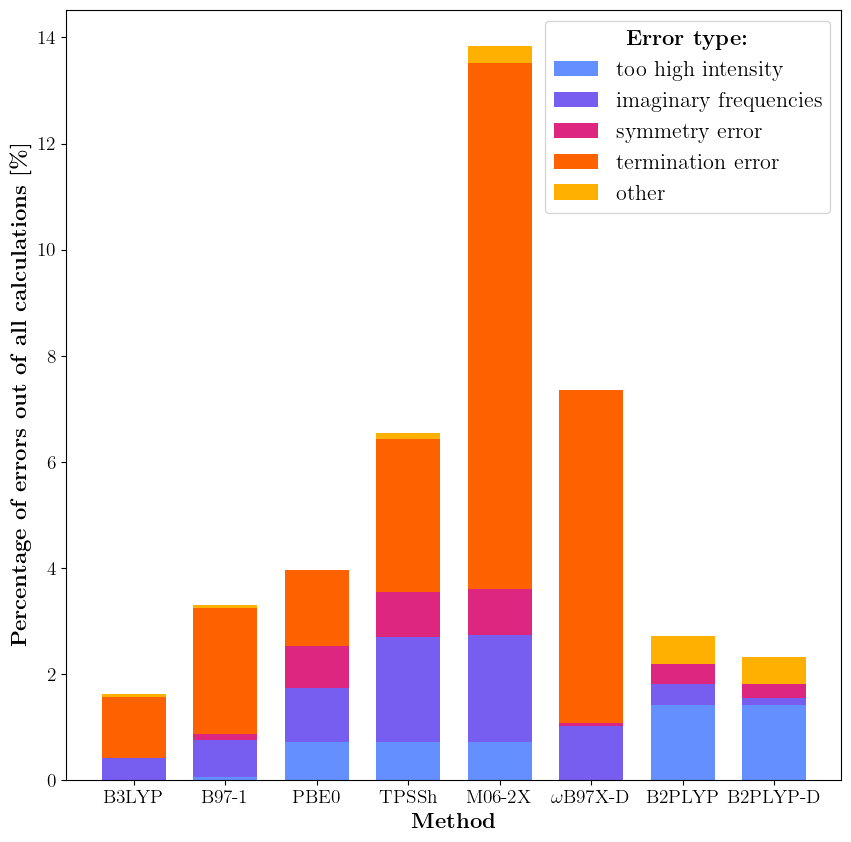

In [29]:
plot_barplot('out of all', '#648FFF', '#785EF0', '#DC267F', '#FE6100', '#FFB000')

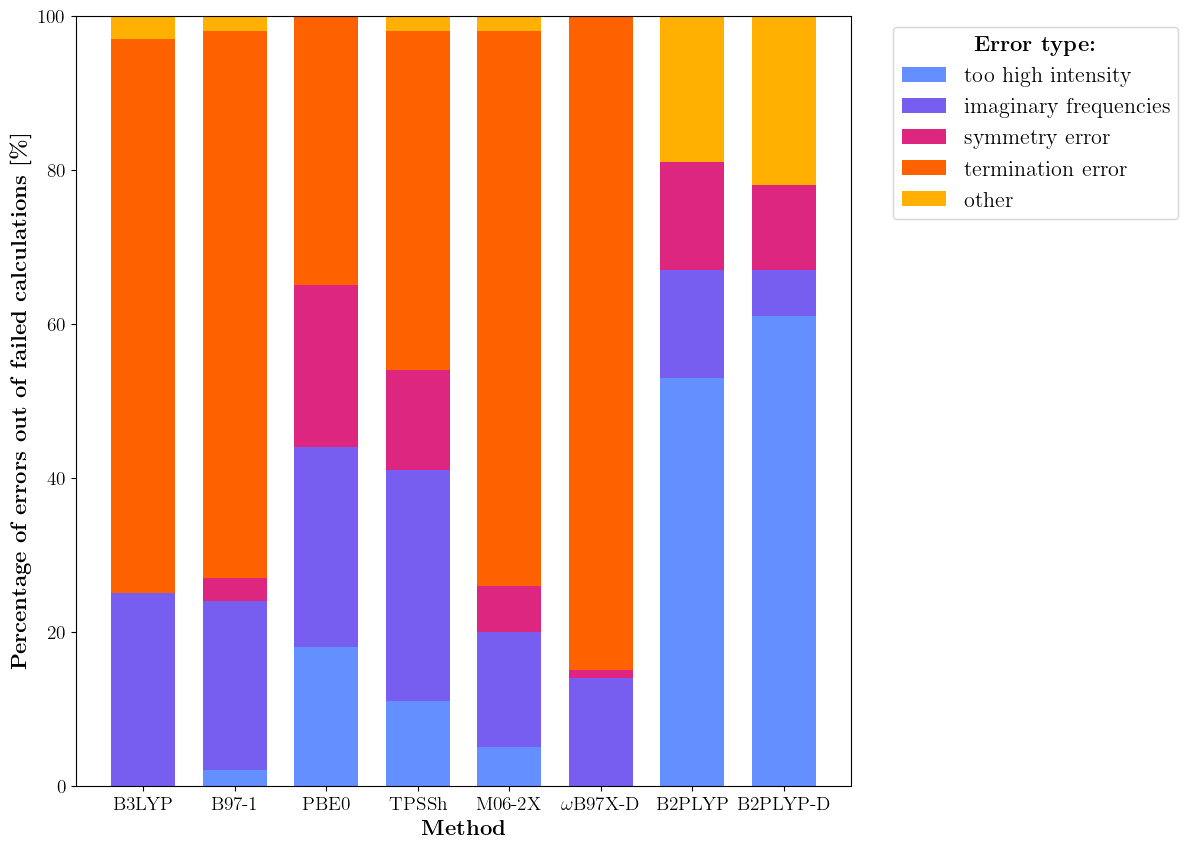

In [30]:
plot_barplot('out of failed', '#648FFF', '#785EF0', '#DC267F', '#FE6100', '#FFB000')

don't run code for presentation figures below this mark

## error types pie plots:

In [31]:
lots_labels = [r'\textbf{B97-1}', r'\textbf{B3LYP}', r'\textbf{$\omega$B97X-D}', r'\textbf{M06-2X}', r'\textbf{PBE0}', r'\textbf{TPSSh}', r'\textbf{B2PLYP}', r'\textbf{B2PLYP-D}']
error_labels = ['too high intensity', 'imaginary frequencies', 'symmetry error', 'termination error', 'other']

#put all percentage out of failed calculations (errors) data into an array:
percentage_data = []

for lot in lots_all :
        
    data = error_types_data.loc[lot][10:15]
    percentage_data.append(data)       
    
#function to plot error types pie plot:
def pie_plot(colors):

    #for B97-1, B3LYP, wB97X-D and M06-2X:
    plt.figure(0)
    f, ax = plt.subplots(1, len(percentage_data[0:4]), figsize = (15, 5))

    #plot each pie chart:
    for i, (data, lot) in enumerate(zip(percentage_data[0:4], lots_labels[0:4])):

        ax[i].pie(data, autopct = lambda p: r'{:.0f}$\%$'.format(round(p)) if p > 0 else '', textprops = {'fontsize': 14}, colors = colors)
        ax[i].set_title(lot, fontsize = 16) 

    plt.tight_layout() #adjust layout
    legend = plt.legend(error_labels, bbox_to_anchor = (1.04, 1), fontsize = 14, title = r'\textbf{Error type:}')
    plt.setp(legend.get_title(), fontsize = '16')
    
    #for PBE0, TPSSh, B2PLYP and B2PLYP-D:
    plt.figure(1)
    f, ax = plt.subplots(1, len(percentage_data[4:9]), figsize = (15, 5))

    #plot each pie chart:
    for i, (data, lot) in enumerate(zip(percentage_data[4:9], lots_labels[4:9])):

        ax[i].pie(data, autopct = lambda p: r'{:.0f}$\%$'.format(round(p)) if p > 0 else '', textprops = {'fontsize': 14}, colors = colors)
        ax[i].set_title(lot, fontsize = 16)
    
    plt.tight_layout() #adjust layout
    legend = plt.legend(error_labels, bbox_to_anchor = (1.04, 1), fontsize = 14, title = r'\textbf{Error type:}')
    plt.setp(legend.get_title(), fontsize = '16')

<Figure size 1000x1000 with 0 Axes>

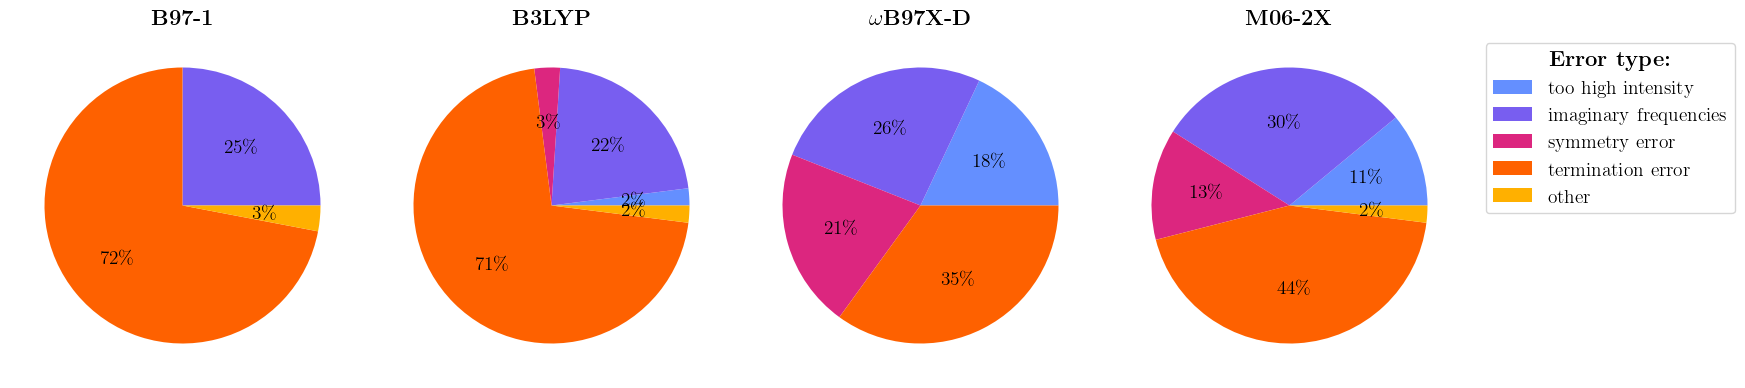

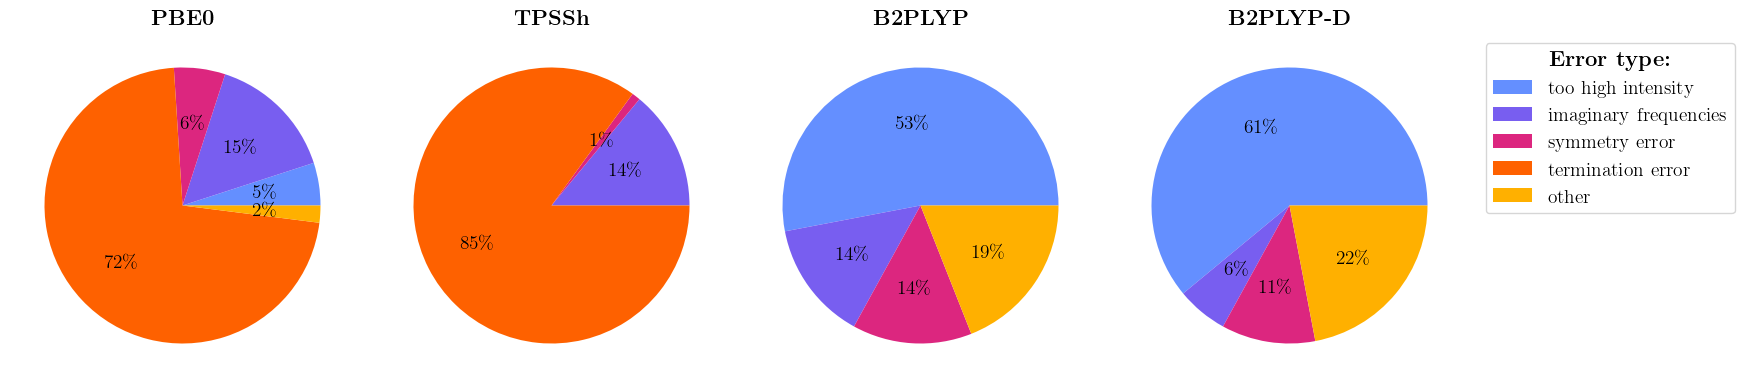

In [32]:
pie_plot(['#648FFF', '#785EF0', '#DC267F', '#FE6100', '#FFB000'])

## error types donut plots:

In [33]:
#function to plot error types as donut plots:
def donut_plot(colors):

    #for B97-1, B3LYP, wB97X-D and M06-2X:
    plt.figure(0)
    f, ax = plt.subplots(1, len(percentage_data[0:4]), figsize = (15, 5))

    #plot each donut chart:
    for i, (data, lot) in enumerate(zip(percentage_data[0:4], lots_labels[0:4])):

        outer_circle = ax[i].pie(data, autopct = lambda p: r'{:.0f}$\%$'.format(round(p)) if p > 0 else '', textprops = {'fontsize': 14}, colors = colors)
        ax[i].set_title(lot, fontsize = 16)

        center_circle = plt.Circle((0, 0), 0.3, color = 'white', fc = 'white')
        ax[i].add_artist(center_circle)

        ax[i].axis('equal')

    plt.tight_layout() #adjust layout
    legend = plt.legend(error_labels, bbox_to_anchor = (1.04, 1), fontsize = 14, title = r'\textbf{Error type:}')
    plt.setp(legend.get_title(), fontsize = '16')
    
    #for PBE0, TPSSh, B2PLYP and B2PLYP-D:
    plt.figure(1)
    f, ax = plt.subplots(1, len(percentage_data[4:9]), figsize = (15, 5))

    #plot each donut chart:
    for i, (data, lot) in enumerate(zip(percentage_data[4:9], lots_labels[4:9])):

        ax[i].pie(data, autopct = lambda p: r'{:.0f}$\%$'.format(round(p)) if p > 0 else '', textprops = {'fontsize': 14}, colors = colors)
        ax[i].set_title(lot, fontsize = 16)
        
        center_circle = plt.Circle((0, 0), 0.3, color = 'white', fc = 'white')
        ax[i].add_artist(center_circle)

        ax[i].axis('equal')
    
    plt.tight_layout() #adjust layout
    legend = plt.legend(error_labels, bbox_to_anchor = (1.04, 1), fontsize = 14, title = r'\textbf{Error type:}')
    plt.setp(legend.get_title(), fontsize = '16')

<Figure size 1000x1000 with 0 Axes>

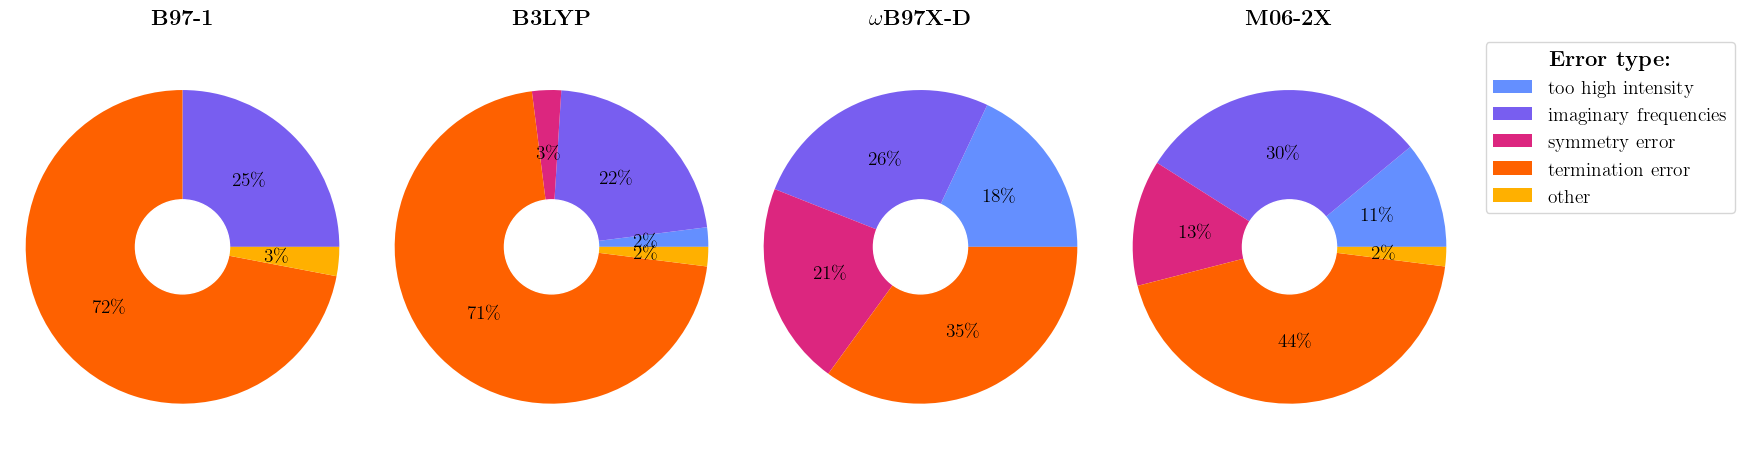

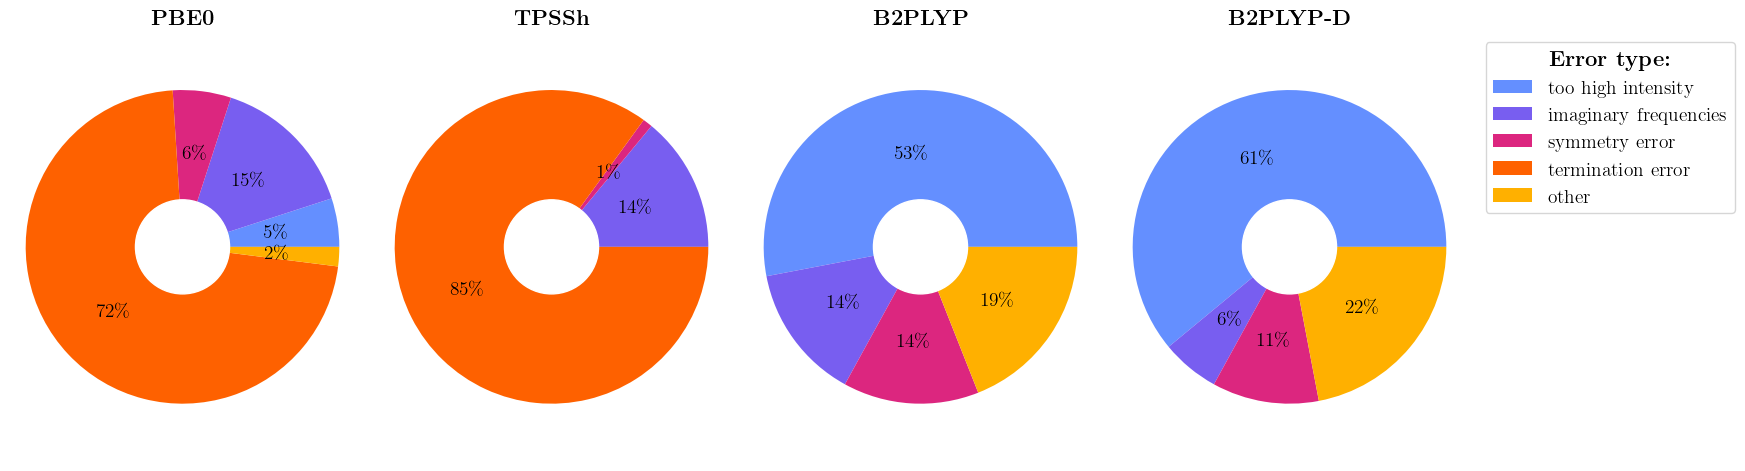

In [34]:
donut_plot(['#648FFF', '#785EF0', '#DC267F', '#FE6100', '#FFB000'])